##### Python for High School (Summer 2022)

* [Table of Contents](PY4HS.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/Py4HS_July_26_2022.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/Py4HS_July_26_2022.ipynb)

### Public Key Crypto

King Bob wants to yak with Queen Alice, without worrying about Eve's eavesdropping.

Bob lists his public key N, with an exponent e, and tells Alice to send her message m raised to the eth power, mod N. Even though Eve knows (e, N), she cannot reverse the operation and get m from c.

When Bob gets c (the cyphertext) from Alice, he raises it even more, to a secret dth power.  The only way to get d was to know the two primes that make N.  Bob shared N, but never the two primes that made it, so his d is secure, unless someone factors his N.  

Bob's secret d is just the right number to make Alice's plaintext message pop out again.  e * d is exactly 1 modulo N's totient, and by Euler's Theorem, any base raised to 1 modulo N's totient, modulo N, is precisely that base.

$$
m = m^{e * d}\mod N  
$$

provided:

$$
(e * d)\mod \phi(N) = 1
$$

$\phi(N)$ is easy to derive provided we know what primes went in to making N.  

$$
\phi(N) = (p - 1)(q - 1)
$$

Bob derived N and $\phi(N)$ at the same time, and from $phi(N)$ derived d.  Alice never needs d.  She has her own secret d, paired with her own public N.

In [1]:
import nums

In [2]:
import primes.euler_test as et

In [3]:
et.test_small()

---< SMALLER NUMBERS >---
Public Stuff:
  e=7
  N=784811
Secret Stuff:
  d=335551
  p1=647
  p2=1213
Text to encrypt:  b'it'
Encrypted: 741475
Decrypted: b'it'


In [4]:
et.test_big()

---< LARGER NUMBERS >---
Public Stuff:
  e=17
  N=352002013083850191164867
Secret Stuff:
  d=269178010004376496567697
  p1=500001668113
  p2=704001677459
Text to encrypt:  b'dingaling'
Encrypted: 243949334666981928158849
Decrypted: b'dingaling'


In [5]:
p1=500001668113
p2=704001677459
N = p1 * p2
totientN = (p1-1)*(p2-1)
e = 17
d = nums.invmod(e, totientN)

In [6]:
e

17

In [7]:
d

269178010004376496567697

In [8]:
(e * d) % totientN

1

In [9]:
N

352002013083850191164867

In [19]:
from binascii import hexlify, unhexlify

In [11]:
m = eval("0x"+str(hexlify(b'dingaling'))[2:-1])
m

1852271530660504104551

In [12]:
c = pow(m, e, N)  # encrypt
c

243949334666981928158849

In [13]:
pow(c, d, N)      # decrypt

1852271530660504104551

In [23]:
h = hex(1852271530660504104551)
h

'0x64696e67616c696e67'

In [24]:
unhexlify(h[2:])

b'dingaling'

In [14]:
e

17

In [15]:
d

269178010004376496567697

In [16]:
e * d % totientN

1

 
$$
c= m^e \mod N
$$ 

$$ m=
 c^d \mod N
$$

$$
m \equiv c^d \equiv m^{e^{d}} \equiv m^{e\cdot d} \mod N
$$


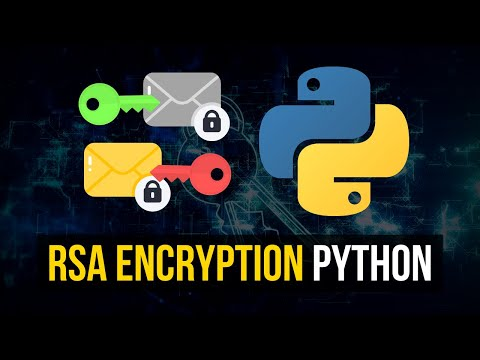

In [25]:
from IPython.display import YouTubeVideo
YouTubeVideo("n0uJsqFGO4k")  # https://youtu.be/n0uJsqFGO4k